# Code

**Date: February 2017**
 

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

colors = sns.color_palette("Blues")
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

**Coin-tossing MLE consistency**


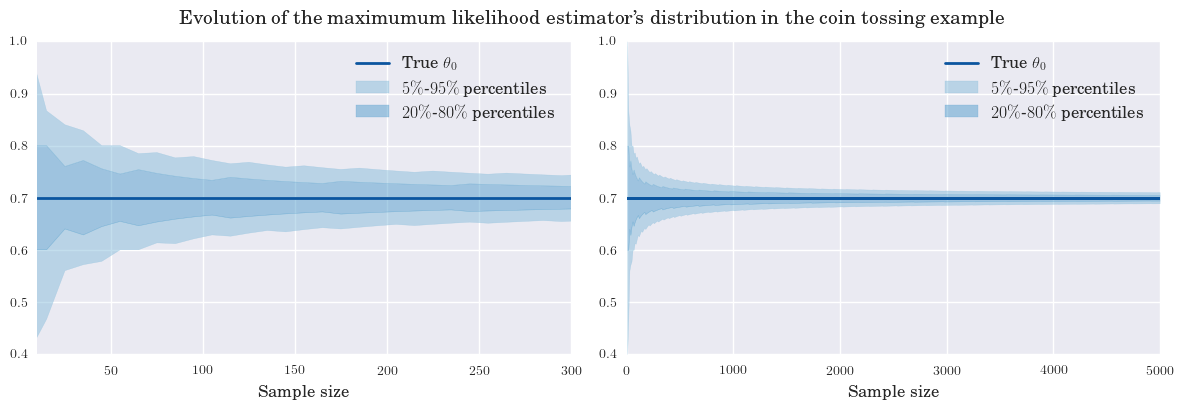

In [3]:
theta0 = .7
N = 5000

sample_sizes = np.arange(5, N, 10)

perc5 = [stats.binom(n, theta0).ppf(.05)/n for n in sample_sizes]
perc25 = [stats.binom(n, theta0).ppf(.2)/n for n in sample_sizes]
perc75 = [stats.binom(n, theta0).ppf(.8)/n for n in sample_sizes]
perc95 = [stats.binom(n, theta0).ppf(.95)/n for n in sample_sizes]

fig, ax = plt.subplots(1, 2, figsize = (12, 4))
fig.suptitle("Evolution of the maximumum likelihood estimator's distribution in the coin tossing example", y = 1.02, fontsize = 14)
small_sample = 200
ax[0].fill_between(sample_sizes[:small_sample], perc5[:small_sample], perc25[:small_sample], 
                   color = colors[2], alpha = .5, label = '$5\%$-$95\%$ percentiles')
ax[0].fill_between(sample_sizes[:small_sample], perc25[:small_sample], perc75[:small_sample], 
                   color = colors[3], alpha = .5, label = '$20\%$-$80\%$ percentiles')
ax[0].fill_between(sample_sizes[:small_sample], perc75[:small_sample], perc95[:small_sample], 
                   color = colors[2], alpha = .5)
ax[0].axhline(theta0, color = colors[5], lw = 2, label = r'True $\theta_0$')
ax[0].set_xlim([10, 300])
ax[0].set_ylim([0.4, 1])
ax[0].set_xlabel('Sample size', fontsize = 12)
ax[0].legend(loc='best', fontsize = 12)

ax[1].fill_between(sample_sizes, perc5, perc25, color = colors[2], alpha = .5, label = '$5\%$-$95\%$ percentiles')
ax[1].fill_between(sample_sizes, perc25, perc75, color = colors[3], alpha = .5, label = '$20\%$-$80\%$ percentiles')
ax[1].fill_between(sample_sizes, perc75, perc95, color = colors[2], alpha = .5)
ax[1].axhline(theta0, color = colors[5], lw = 2, label = r'True $\theta_0$')
ax[1].set_ylim([0.4, 1])
ax[1].set_xlabel('Sample size', fontsize = 12)
ax[1].legend(loc='best', fontsize = 12)
ax[1].axhline(theta0, color = colors[5], lw = 2, label = r'True $\theta_0$')
plt.tight_layout()
plt.savefig('asymptotic_cointoss_consistency.png', format = 'png', dpi = 800, bbox_inches='tight')
plt.show()

**Uniform LLN -- coin-tossing tail probabilities**

In [4]:
def relative_entropy(prob0, theta0, a):
    return prob0 * np.log(theta0/a) + (1 - prob0) * np.log((1 - theta0)/(1 - a))

def loss_distribution(l, aa, loss_func, true_dist, upper):
    """
    Uses the formula for the change of discrete random variable. It takes care of the 
    fact that the loss is not monotone.
    """
    eps = 1e-10
    n, theta0 = true_dist.args
    
    if loss_func == 'relative_entropy':
        frac = sp.optimize.bisect(lambda x: relative_entropy(x, theta0, aa) - l, a = eps, b = 1 - eps)
    
    elif loss_func == 'quadratic':
        frac = (l - aa**2)/((1 - aa)**2 - aa**2)

    if aa < .5: #theta0:
        if upper:
            return 1 - true_dist.cdf(frac * n)
        else:
            return true_dist.cdf(frac * n)
    else:
        if upper:
            return true_dist.cdf(frac * n)
        else:
            return 1 - true_dist.cdf(frac * n)
        
def prob(l, a, true_dist):
    n, theta0 = true_dist.args
    #true = relative_entropy(theta0, theta0, a)
    true = theta0 * (1 - a)**2 + (1 - theta0) * a**2
    
    upper = true + l
    lower = true - l
    
    first = loss_distribution(upper, a, "quadratic", true_dist, upper = True)
    second = loss_distribution(lower, a, "quadratic", true_dist, upper = False)
    
    return first + second

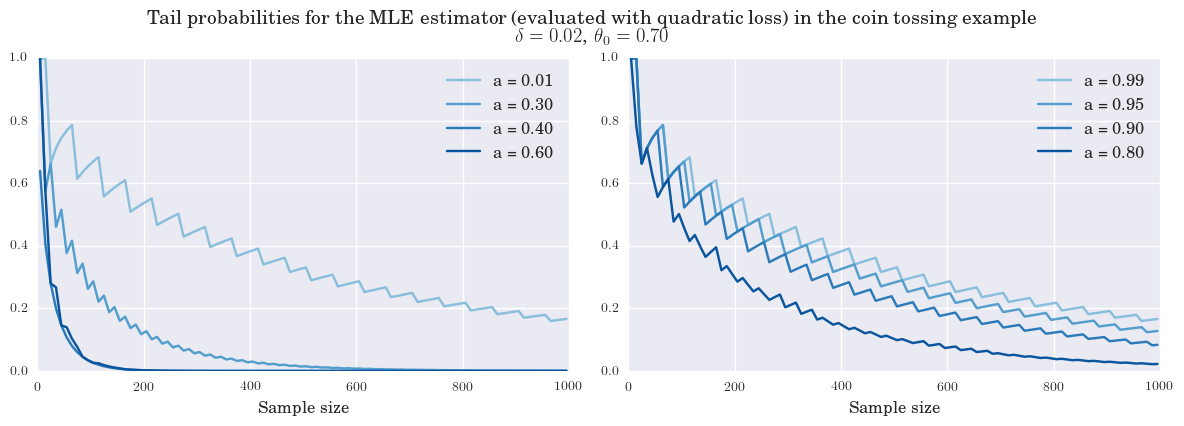

In [5]:
sample_size = np.arange(5, 1000, 10)
action_grid1 = [.01, .3, .4, .6]
action_grid2 = [.99, .95, .9, .8]
delta = .02

fig, ax = plt.subplots(1, 2, figsize = (12, 4))
fig.suptitle('Tail probabilities for the MLE estimator (evaluated with quadratic loss) in the coin tossing example \n' + 
             r"$\delta = {:1.2f}$,  $\theta_0 = {:1.2f}$".format(delta, theta0), 
            fontsize = 14, y = 1.06)
for i, a in enumerate(action_grid1):
    ax[0].plot(sample_size, [prob(delta, a, stats.binom(nn, theta0)) for nn in sample_size], 
               label = r'a = {:1.2f}'.format(a), color = colors[2 + i])
ax[0].legend(loc = 'best', fontsize = 12)
ax[0].set_xlabel('Sample size', fontsize = 12)

for i, a in enumerate(action_grid2):
    ax[1].plot(sample_size, [prob(delta, a, stats.binom(nn, theta0)) for nn in sample_size], 
               label = r'a = {:1.2f}'.format(a), color = colors[2 + i])
ax[1].legend(loc = 'best', fontsize = 12)
ax[1].set_xlabel('Sample size', fontsize = 12)
plt.tight_layout()
plt.savefig('asymptotic_cointoss_tail.png', format = 'png', dpi = 800, bbox_inches='tight')
plt.show()

**Concentration inequalities**

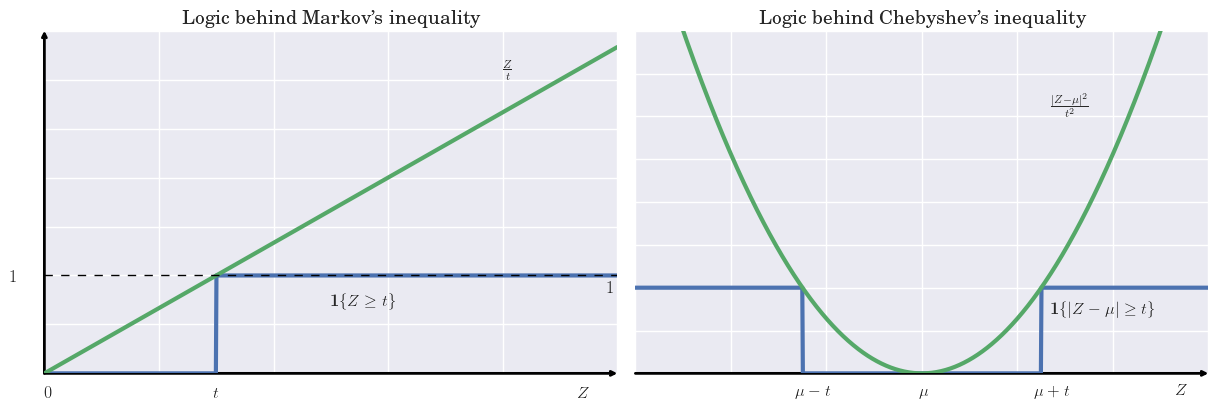

In [20]:
z = np.linspace(0, 10, 1000)
t = 3

f1 = (z >= t)
f2 = z / t

colors = sns.color_palette()

fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].add_artist(ConnectionPatch(xyA=(0, 0), xyB=(10, 0), coordsA="data", coordsB="data",
                                 arrowstyle="->", mutation_scale=10, lw = 2))
ax[0].add_artist(ConnectionPatch(xyA=(0, 0), xyB=(0, 3.5), coordsA="data", coordsB="data",
                                 arrowstyle="->", mutation_scale=10, lw = 2))

ax[0].plot(z, f1, color = colors[0], lw = 3, label = r'$\mathbf{1}\{Z \geq t\}$')
ax[0].plot(z, f2, color = colors[1], lw = 3, label = r'$\frac{Z}{t}$')
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].text(9.3, -.25, r'$Z$', fontsize = 12)
ax[0].text(8, 3, r'$\frac{Z}{t}$', fontsize = 12)
ax[0].text(5, .7, '$\mathbf{1}\{Z \geq t\}$', fontsize = 12)
ax[0].text(t - .05, -.25, '$t$', fontsize = 12)
ax[0].text(0, -.25, '$0$', fontsize = 12)
ax[0].text( -.6, .93, r'$1$', fontsize = 12)
ax[0].axhline(1, linestyle = '--', color = 'k', lw = 1)
ax[0].set_title('Logic behind Markov\'s inequality', fontsize=16)

t = 2.5
mu = 2
z = np.linspace(mu - 6, mu + 6, 1000)

g1 = (z >= mu + t) + (z <= mu - t)
g2 = ((z - mu) / t)**2

ax[1].add_artist(ConnectionPatch(xyA=(mu - 6, 0), xyB=(mu + 6, 0), coordsA="data", coordsB="data",
                                 arrowstyle="->", mutation_scale=10, lw = 2))
ax[1].plot(z, g1, color = colors[0], lw = 3, label = r'$\mathbf{1}\{Z \geq t\}$')
ax[1].plot(z, g2, color = colors[1], lw = 3, label = r'$Z/t$')
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].text(mu + 5.3, -.25, r'$Z$', fontsize = 12)
ax[1].text(4.7, 3, r'$\frac{|Z-\mu|^2}{t^2}$', fontsize = 12)
ax[1].text(4.7, .7, r'$\mathbf{1}\{|Z -\mu |\geq t\}$', fontsize = 12)
ax[1].text(mu - .05, -.25, r'$\mu$', fontsize = 12)
ax[1].text(mu + t - .15, -.25, r'$\mu + t$', fontsize = 12)
ax[1].text(mu - t - .15, -.25, r'$\mu - t$', fontsize = 12)
ax[1].text(mu - 6 - .6, .93, r'$1$', fontsize = 12)
ax[1].set_title('Logic behind Chebyshev\'s inequality', fontsize=16)
ax[1].set_ylim([0, 4])
plt.tight_layout()
plt.savefig('asymptotic_markov_chebyshev.png', format = 'png', dpi = 800, bbox_inches='tight')
plt.show()

**Rademacher complexity -- coin-tossing**


In [8]:
# Compute the Rademacher compelxity for the coin tossing example
n, k = 10, 6

def given_epsilon_path(n3, n4, n, k):
    n1 = n - k - n3
    n2 = k - n4
    
    diff1 = n1 - n3
    diff2 = n2 - n4
    
    term1 = abs(diff1/n)
    term2 = abs(diff2/n)
    
    if diff1 + diff2 != 0:
        term3 = abs((diff2/(diff1 + diff2))**2 * (diff1/n) + (diff1/(diff1 + diff2))**2 * (diff2/n))
    else:
        term3 = 0
        
    return max(term1, term2, term3)
    
    
def empirical_rademacher(n, k):
    prob_row = stats.binom(k, .5).pmf(np.arange(k + 1)).reshape(k + 1, 1)
    prob_col = stats.binom(n - k, .5).pmf(np.arange(n - k + 1)).reshape(1, n - k + 1)    
    prob_matrix = prob_row * prob_col
    
    emp_rad = 0
    for i in range(k + 1):               # loop for n4
        for j in range(n - k + 1):       # loop for n3
            emp_rad += given_epsilon_path(j, i, n, k) * prob_matrix[i, j]
    
    return emp_rad

def rademacher_complexity(n): 
    true_prob = stats.binom(n, theta0).pmf(np.arange(n + 1)).reshape(n + 1, 1)
    rademacher = 0
    
    for i in range(n + 1):
        rademacher += true_prob[i] * empirical_rademacher(n, i)
    
    return rademacher[0]


In [9]:
samples = np.arange(10, 1000, 50)
RC = [rademacher_complexity(n) for n in samples]

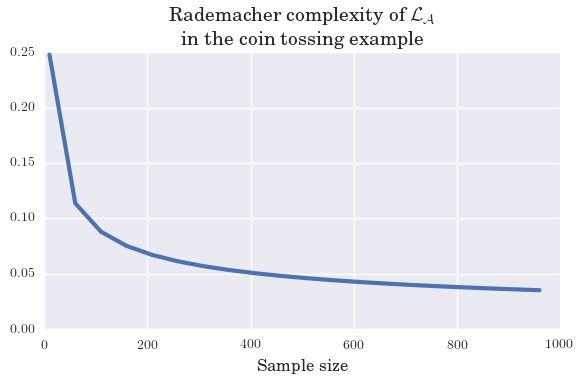

In [25]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.plot(samples, RC, lw = 3)
ax.set_title("Rademacher complexity of $\mathcal{L}_{\mathcal{A}}$ \nin the coin tossing example", fontsize = 14)
ax.set_xlabel('Sample size', fontsize = 12)
ax.set_ylim([0, .25])
plt.tight_layout()
plt.savefig('asymptotic_rademacher_cointoss.png', format = 'png', dpi = 800, bbox_inches='tight')
plt.show()

**Rademacher -- sinusoid classification**

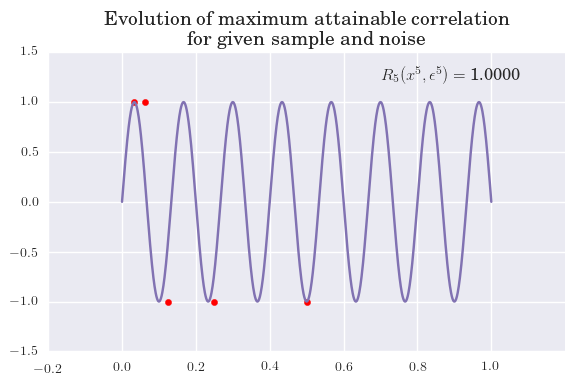

In [22]:
def rademacher(n):
    '''Generates N Rademcaher random variables.'''
    aux = np.random.rand(int(n))
    return np.array([1 if x >= .5 else -1 for x in aux])

n = 5
fig, ax = plt.subplots(figsize = (6, 4))

x = np.array([2**(-(i+1)) for i in range(n)])
y = rademacher(int(n))

y_aux = np.array([1 if r > 0 else 0 for r in y])
x_aux = np.array([2**((i+1)) for i in range(int(n))])

a = np.pi*((1-y_aux)@x_aux + 1)

c = np.array([1 if np.sin(a*x) > 0 else -1 for x in x])
R = c @ y / int(n)

x_axis = np.linspace(0, 1, 1000)

ax.plot(x_axis, np.sin(a*x_axis), color = colors[3])
ax.scatter(x, y, color = 'r')
ax.set_xlim([-.2, 1.2])
ax.set_ylim([-1.5, 1.5])
ax.text(.7, 1.2, r'$R' + r'_{}(x^{}, \epsilon^{}) = $'.format({int(n)}, {int(n)}, {int(n)}) + ' {:.4f}'.format(R), fontsize=12)
ax.set_title('Evolution of maximum attainable correlation\n for given sample and noise', fontsize=14)
plt.tight_layout()
plt.savefig('asymptotic_rademacher_sinusoid.png', format = 'png', dpi = 800, bbox_inches='tight')
plt.show()